#download dataset and unzip it


In [ ]:
! pip install -q kaggle
! wget -O kaggle.json https://www.dropbox.com/scl/fi/amv2gsk1p5i9wxb8p5zpr/kaggle.json?rlkey=emiwyawi585luzwzhp7maosjg&dl=1
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d fedesoriano/company-bankruptcy-prediction

--2025-07-15 22:08:37--  https://www.dropbox.com/scl/fi/amv2gsk1p5i9wxb8p5zpr/kaggle.json?rlkey=emiwyawi585luzwzhp7maosjg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc89fe06a592f2b67d052a27b999.dl.dropboxusercontent.com/cd/0/inline/Cti_gp87lH8HvOU_3CGhHqAr5mrYyjY8Uwp6JMly2yFO1jmUOWAsS5xCrAycQ1ROJae_bQIVxIis8xW_FoO9yOQruU0pSUxoWBO98b7vds78S3ajudWBqjMYFKKfj3L_GF2hVNe6BwCim0pcdKVPfwR5/file# [following]
--2025-07-15 22:08:37--  https://uc89fe06a592f2b67d052a27b999.dl.dropboxusercontent.com/cd/0/inline/Cti_gp87lH8HvOU_3CGhHqAr5mrYyjY8Uwp6JMly2yFO1jmUOWAsS5xCrAycQ1ROJae_bQIVxIis8xW_FoO9yOQruU0pSUxoWBO98b7vds78S3ajudWBqjMYFKKfj3L_GF2hVNe6BwCim0pcdKVPfwR5/file
Resolving uc89fe06a592f2b67d052a27b999.dl.dropboxusercontent.com (uc89fe06a592f2b67d052a27b999.dl.dropboxusercontent.com)... 162.125.5.15, 2620:10

In [ ]:
import os

zip_file_path = 'company-bankruptcy-prediction.zip'

if os.path.exists(zip_file_path):
    print(f"File '{zip_file_path}' found. Unzipping...")
    !unzip -o {zip_file_path} -d dataset
else:
    print(f"Error: File '{zip_file_path}' not found.")

File 'company-bankruptcy-prediction.zip' found. Unzipping...
Archive:  company-bankruptcy-prediction.zip
  inflating: dataset/data.csv        


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Modèle sans SMOTE

##EDA

In [ ]:
dataset = pd.read_csv('/content/dataset/data.csv')
dataset.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


/tmp/ipython-input-124-2455948103.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bankrupt_counts.index, y=bankrupt_counts.values, palette="viridis")


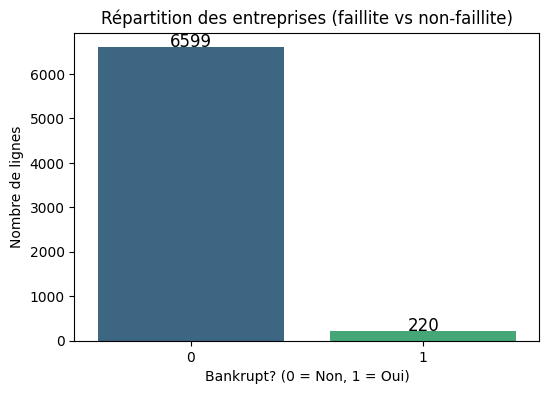

In [ ]:
bankrupt_counts = dataset['Bankrupt?'].value_counts()


plt.figure(figsize=(6, 4))
sns.barplot(x=bankrupt_counts.index, y=bankrupt_counts.values, palette="viridis")


for i, val in enumerate(bankrupt_counts.values):
    plt.text(i, val + 5, str(val), ha='center', fontsize=12)

plt.title("Répartition des entreprises (faillite vs non-faillite)")
plt.xlabel("Bankrupt? (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de lignes")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder


non_numeric_cols = dataset.select_dtypes(include='object').columns

if len(non_numeric_cols) > 0:
    print("Colonnes non numériques détectées :", list(non_numeric_cols))


    for col in non_numeric_cols:
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])
    print("Encodage terminé.")
else:
    print("Aucune colonne non numérique détectée.")


Aucune colonne non numérique détectée.


In [ ]:
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


In [ ]:

missing = dataset.isnull().sum()
missing = missing[missing > 0]

if not missing.empty:
    print("Colonnes avec valeurs manquantes :\n", missing)
else:
    print("✅ Aucune valeur manquante détectée.")


✅ Aucune valeur manquante détectée.


In [ ]:
X = dataset.drop(columns=['Bankrupt?'])
y = dataset['Bankrupt?']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 3. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

##RandomForest

In [ ]:
model_no_smote = RandomForestClassifier(random_state=42)
model_no_smote.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_no_smote = model_no_smote.predict(X_test)
y_proba_no_smote = model_no_smote.predict_proba(X_test)[:, 1]

auc_no_smote = roc_auc_score(y_test, y_proba_no_smote)
print("ROC AUC :", auc_no_smote)

ROC AUC : 0.9322916666666667


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
print("Classification Report:")
print(classification_report(y_test, y_pred_no_smote))
accuracy_no_smote = accuracy_score(y_test, y_pred_no_smote)
loss = log_loss(y_test, y_proba_no_smote)

print(f"\nAccuracy: {accuracy_no_smote:.4f}")
print(f"Log Loss: {loss:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.58      0.16      0.25        44

    accuracy                           0.97      1364
   macro avg       0.78      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364


Accuracy: 0.9692
Log Loss: 0.1051


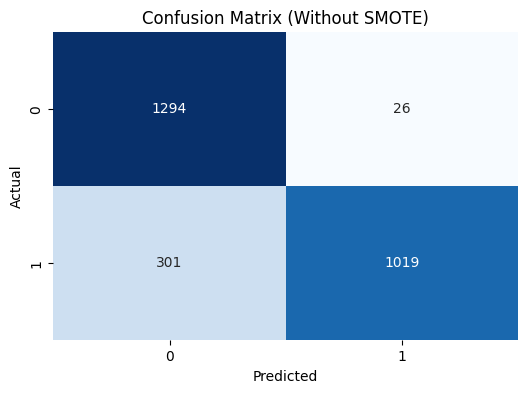

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_no_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Without SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC AUC : 0.9322916666666667


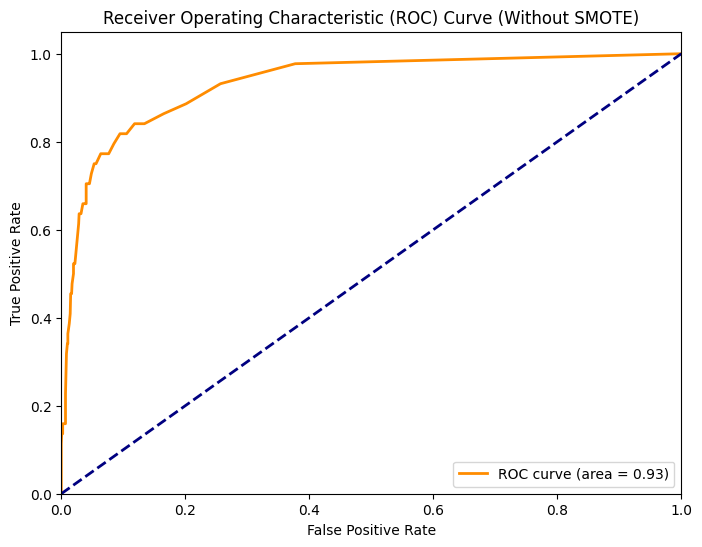

In [ ]:
auc_no_smote = roc_auc_score(y_test, y_proba_no_smote)
print("ROC AUC :", auc_no_smote)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba_no_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_no_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Without SMOTE)')
plt.legend(loc="lower right")
plt.show()

##LGBM

In [ ]:
import lightgbm as lgb
model_no_smote = lgb.LGBMClassifier(random_state=42)
model_no_smote.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 176, number of negative: 5279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23713
[LightGBM] [Info] Number of data points in the train set: 5455, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032264 -> initscore=-3.401008
[LightGBM] [Info] Start training from score -3.401008


LGBMClassifier(random_state=42)

In [ ]:
y_pred_no_smote = model_no_smote.predict(X_test)
y_proba_no_smote = model_no_smote.predict_proba(X_test)[:, 1]

auc_no_smote = roc_auc_score(y_test, y_proba_no_smote)
print("ROC AUC :", auc_no_smote)

ROC AUC : 0.9538739669421488


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss


print("Classification Report:")
print(classification_report(y_test, y_pred_no_smote))
accuracy_no_smote_lgbm = accuracy_score(y_test, y_pred_no_smote)
loss = log_loss(y_test, y_proba_no_smote)

print(f"\nAccuracy: {accuracy_no_smote_lgbm:.4f}")
print(f"Log Loss: {loss:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1320
           1       0.68      0.30      0.41        44

    accuracy                           0.97      1364
   macro avg       0.83      0.65      0.70      1364
weighted avg       0.97      0.97      0.97      1364


Accuracy: 0.9729
Log Loss: 0.1175


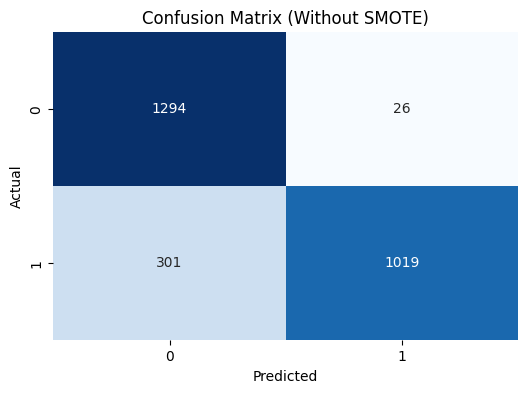

In [ ]:
cm2 = confusion_matrix(y_test, y_pred_no_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Without SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC AUC : 0.9538739669421488


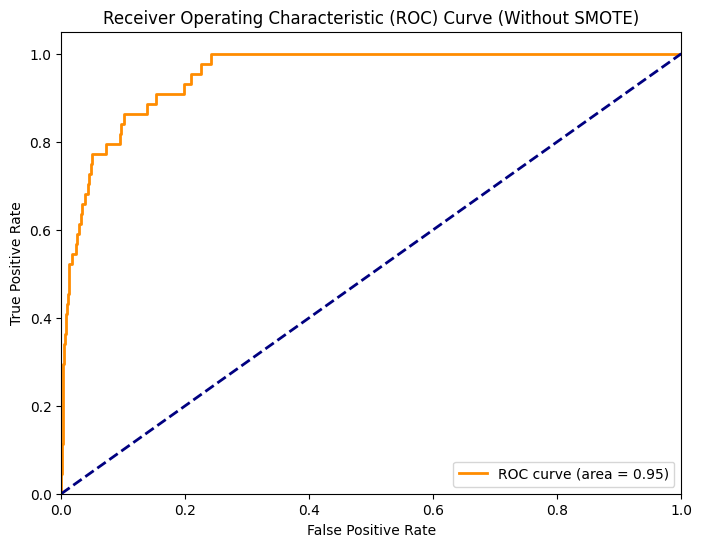

In [ ]:
auc_no_smote = roc_auc_score(y_test, y_proba_no_smote)
print("ROC AUC :", auc_no_smote)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba_no_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_no_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Without SMOTE)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

##KNN

In [ ]:
model_no_smote = KNeighborsClassifier()
model_no_smote.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_no_smote = model_no_smote.predict(X_test)
y_proba_no_smote = model_no_smote.predict_proba(X_test)[:, 1]

auc_no_smote = roc_auc_score(y_test, y_proba_no_smote)
print("ROC AUC :", auc_no_smote)

ROC AUC : 0.7424414600550964


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss


print("Classification Report:")
print(classification_report(y_test, y_pred_no_smote))


accuracy_no_smote_knn = accuracy_score(y_test, y_pred_no_smote)
loss = log_loss(y_test, y_proba_no_smote)

print(f"\nAccuracy: {accuracy_no_smote_knn:.4f}")
print(f"Log Loss: {loss:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.67      0.18      0.29        44

    accuracy                           0.97      1364
   macro avg       0.82      0.59      0.64      1364
weighted avg       0.96      0.97      0.96      1364


Accuracy: 0.9707
Log Loss: 0.5708


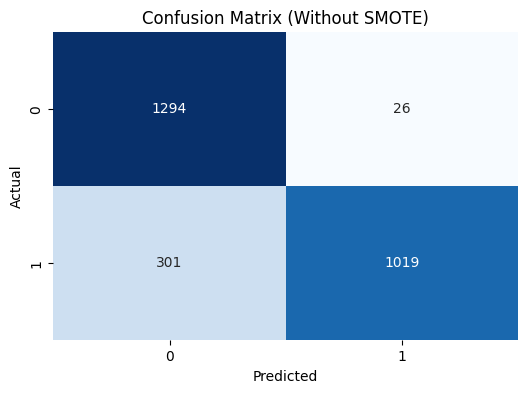

In [ ]:
cm3 = confusion_matrix(y_test, y_pred_no_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Without SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC AUC : 0.7424414600550964


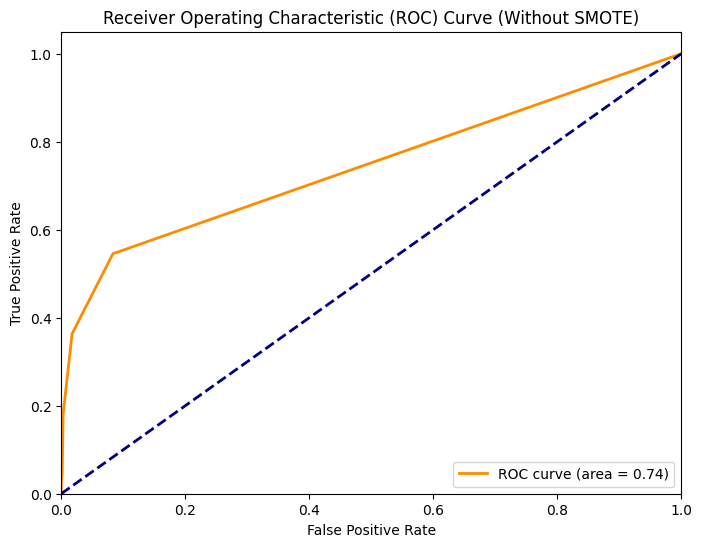

In [ ]:
auc_no_smote = roc_auc_score(y_test, y_proba_no_smote)
print("ROC AUC :", auc_no_smote)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba_no_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_no_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Without SMOTE)')
plt.legend(loc="lower right")
plt.show()

#  Modèle avec SMOTE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


##Prepare features and labels

In [ ]:
X1 = dataset.drop(columns=['Bankrupt?'])
y1 = dataset['Bankrupt?']

In [ ]:
#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [ ]:
#Split the data before SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y1, test_size=0.2, stratify=y, random_state=42
)

## Apply SMOTE on the training set

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_smote))

Before SMOTE: [5279  176]
After SMOTE: [5279 5279]


##RandomForest

In [ ]:
model_no_smote = RandomForestClassifier(random_state=42)
model_no_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_no_smote = model_no_smote.predict(X_test_smote)
y_proba_no_smote = model_no_smote.predict_proba(X_test_smote)[:, 1]

auc_no_smote = roc_auc_score(y_test_smote, y_proba_no_smote)
print("ROC AUC :", auc_no_smote)

ROC AUC : 0.9716945018365473


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_test_smote, y_pred_no_smote))

# Calculate and print accuracy and loss
accuracy_smote_rfc = accuracy_score(y_test_smote, y_pred_no_smote)
loss = log_loss(y_test_smote, y_proba_no_smote)

print(f"\nAccuracy: {accuracy_smote_rfc:.4f}")
print(f"Log Loss: {loss:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1320
           1       0.97      0.78      0.86      1320

    accuracy                           0.88      2640
   macro avg       0.89      0.88      0.88      2640
weighted avg       0.89      0.88      0.88      2640


Accuracy: 0.8765
Log Loss: 0.3116


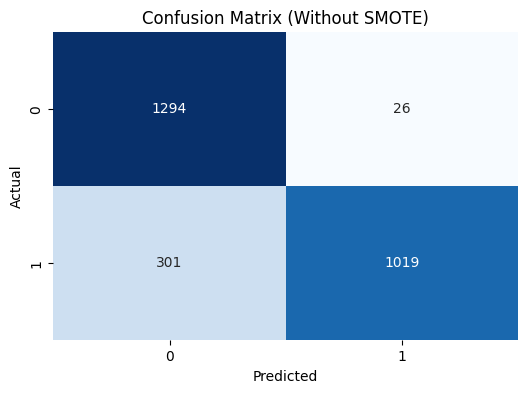

In [ ]:
cm4 = confusion_matrix(y_test_smote, y_pred_no_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Without SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC AUC : 0.9716945018365473


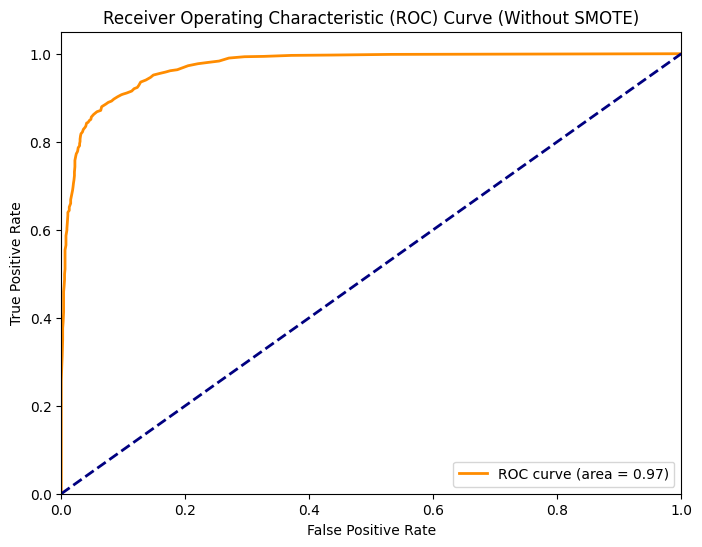

In [ ]:
auc_no_smote = roc_auc_score(y_test_smote, y_proba_no_smote)
print("ROC AUC :", auc_no_smote)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_smote, y_proba_no_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_no_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Without SMOTE)')
plt.legend(loc="lower right")
plt.show()

## LGBM

In [ ]:
model_lgb_smote = lgb.LGBMClassifier(random_state=42)
model_lgb_smote.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5279, number of negative: 5279
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23735
[LightGBM] [Info] Number of data points in the train set: 10558, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🎯 Accuracy: 0.8761

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1320
           1       0.98      0.77      0.86      1320

    accuracy                           0.88      2640
   macro avg       0.89      0.88      0.87      2640
weighted avg       0.89      0.88      0.87      2640



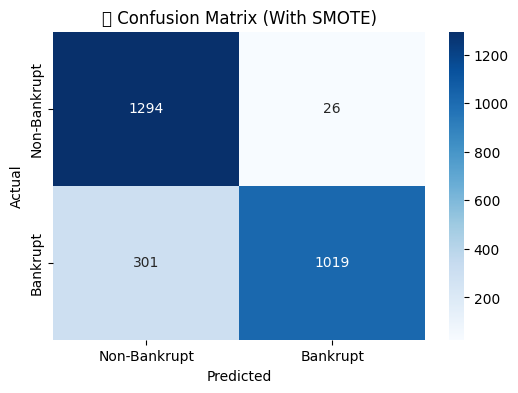

In [ ]:
# Predict
y_pred_smote = model_lgb_smote.predict(X_test_smote)
y_proba_smote = model_lgb_smote.predict_proba(X_test_smote)[:, 1]

# Accuracy
acc_smote_lgbm = accuracy_score(y_test_smote, y_pred_smote)
print(f"🎯 Accuracy: {acc_smote_lgbm:.4f}")

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test_smote, y_pred_smote))

# Confusion matrix
cm5 = confusion_matrix(y_test_smote, y_pred_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Bankrupt", "Bankrupt"], yticklabels=["Non-Bankrupt", "Bankrupt"])
plt.title(" Confusion Matrix (With SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


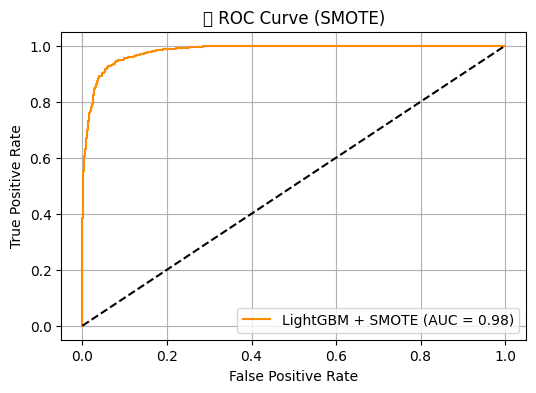

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_smote, y_proba_smote)
auc_score = roc_auc_score(y_test_smote, y_proba_smote)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"LightGBM + SMOTE (AUC = {auc_score:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve (SMOTE)")
plt.legend()
plt.grid()
plt.show()


##KNN

In [ ]:
model_no_smote = KNeighborsClassifier()
model_no_smote.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [ ]:
y_pred_no_smote = model_no_smote.predict(X_test_smote)
y_proba_no_smote = model_no_smote.predict_proba(X_test_smote)[:, 1]

auc_no_smote = roc_auc_score(y_test_smote, y_proba_no_smote)
print("ROC AUC :", auc_no_smote)

ROC AUC : 0.9104539715335169


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss


print("Classification Report:")
print(classification_report(y_test_smote, y_pred_no_smote))


accuracy_smote_knn = accuracy_score(y_test_smote, y_pred_no_smote)
loss = log_loss(y_test_smote, y_proba_no_smote)

print(f"\nAccuracy: {accuracy_no_smote:.4f}")
print(f"Log Loss: {loss:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1320
           1       0.89      0.81      0.85      1320

    accuracy                           0.85      2640
   macro avg       0.86      0.85      0.85      2640
weighted avg       0.86      0.85      0.85      2640


Accuracy: 0.9692
Log Loss: 2.2215


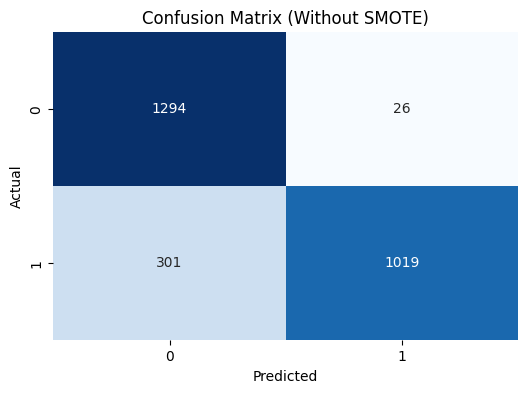

In [ ]:
cm6 = confusion_matrix(y_test_smote, y_pred_no_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Without SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ROC AUC : 0.9104539715335169


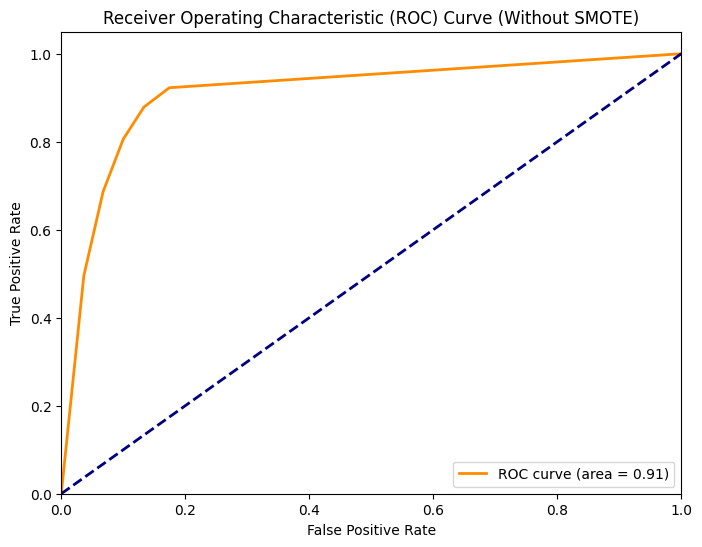

In [ ]:
auc_no_smote = roc_auc_score(y_test_smote, y_proba_no_smote)
print("ROC AUC :", auc_no_smote)

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_smote, y_proba_no_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_no_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Without SMOTE)')
plt.legend(loc="lower right")
plt.show()

#Create a bar chart comparing the two


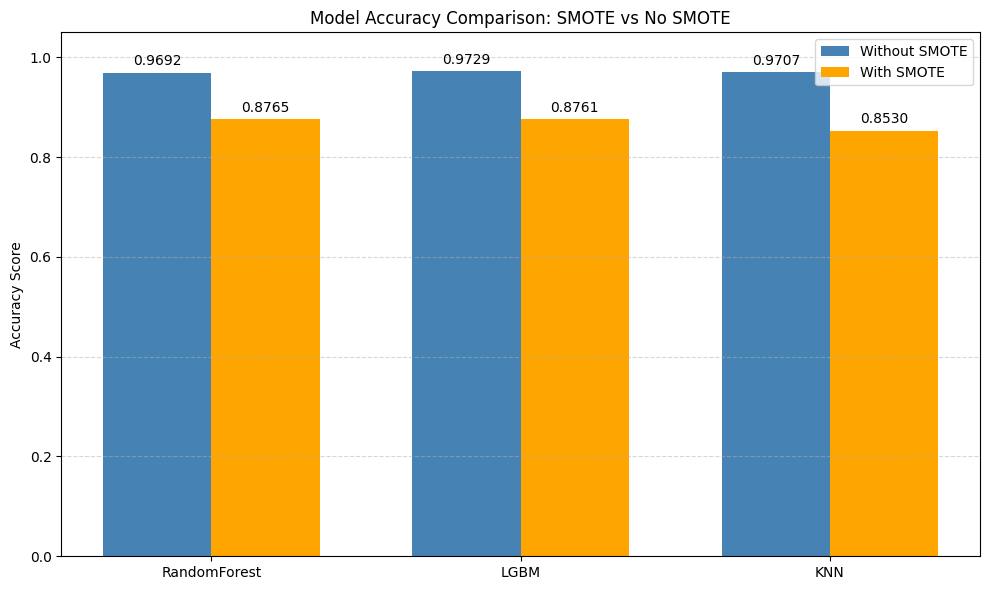

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


accuracy_no_smote_rf = accuracy_no_smote
accuracy_no_smote_lgbm = accuracy_no_smote_lgbm
accuracy_no_smote_knn = accuracy_no_smote_knn

accuracy_smote_rf = accuracy_smote_rfc
accuracy_smote_lgbm = acc_smote_lgbm
accuracy_smote_knn = accuracy_smote_knn



metrics = ['RandomForest', 'LGBM', 'KNN']
values_no_smote = [accuracy_no_smote_rf, accuracy_no_smote_lgbm, accuracy_no_smote_knn]
values_smote = [accuracy_smote_rf, accuracy_smote_lgbm, accuracy_smote_knn]

x = np.arange(len(metrics))
width = 0.35


fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, values_no_smote, width, label='Without SMOTE', color='steelblue')
bars2 = ax.bar(x + width/2, values_smote, width, label='With SMOTE', color='orange')


for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')


ax.set_ylabel('Accuracy Score')
ax.set_title('Model Accuracy Comparison: SMOTE vs No SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

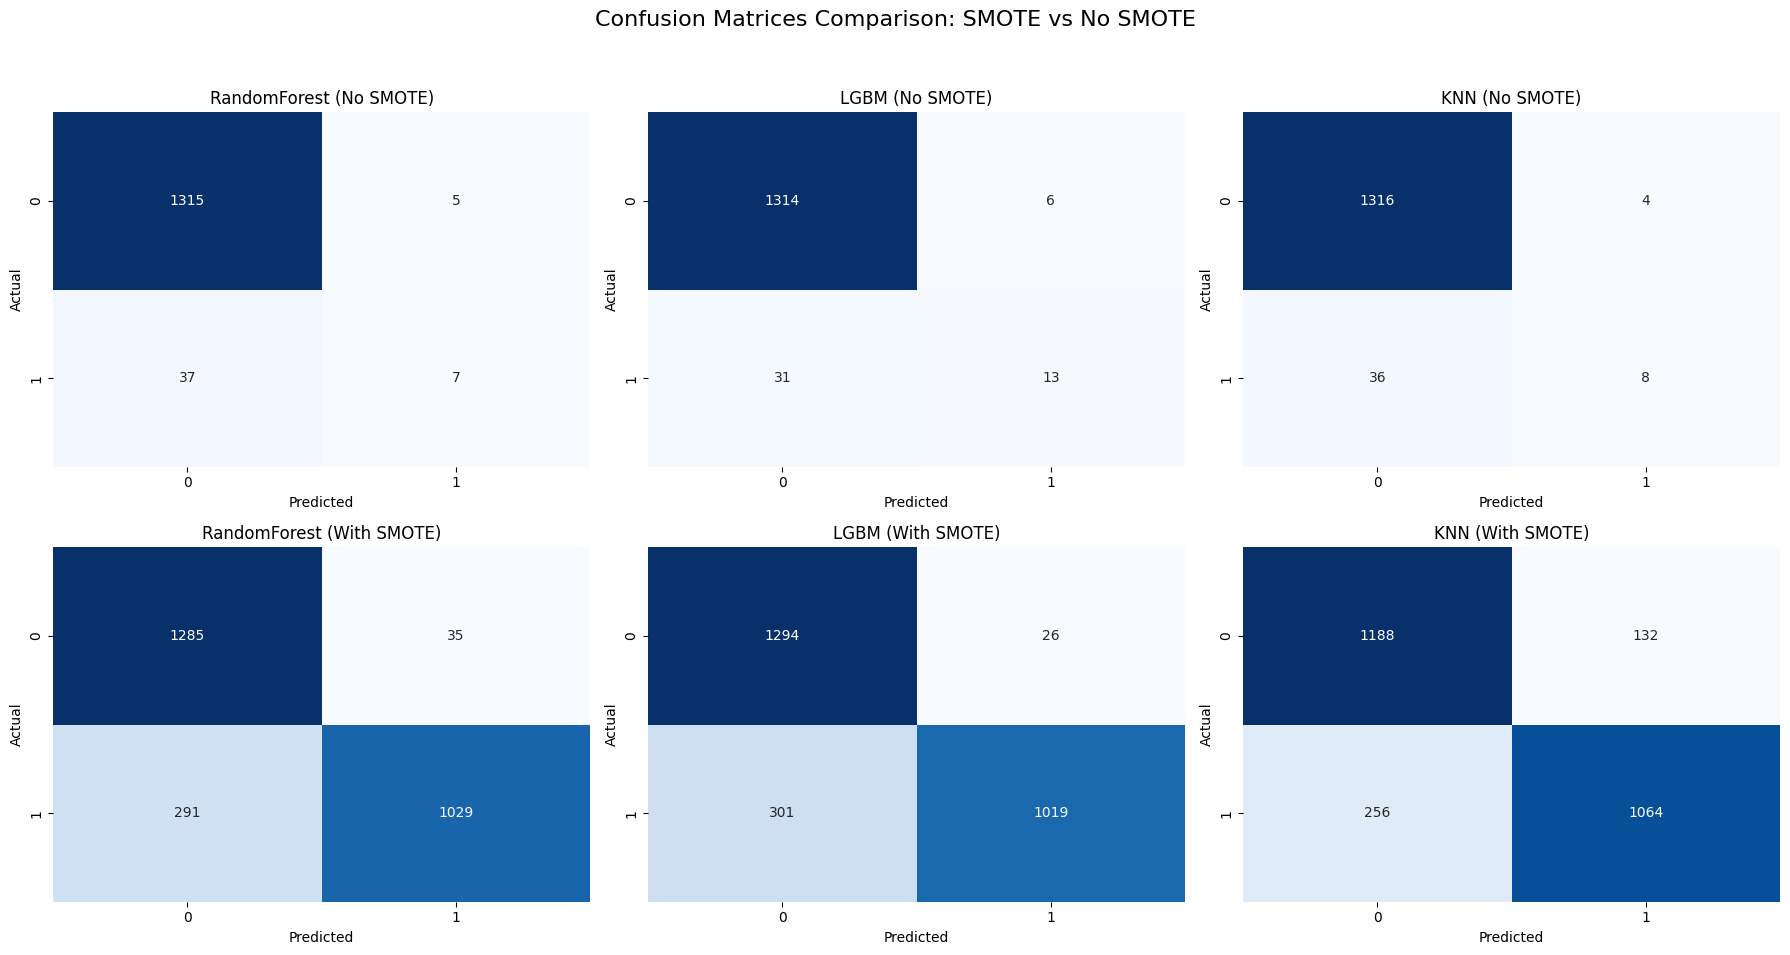

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Confusion Matrices Comparison: SMOTE vs No SMOTE', fontsize=16)

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('RandomForest (No SMOTE)')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('LGBM (No SMOTE)')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0, 2])
axes[0, 2].set_title('KNN (No SMOTE)')
axes[0, 2].set_xlabel('Predicted')
axes[0, 2].set_ylabel('Actual')

sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 0])
axes[1, 0].set_title('RandomForest (With SMOTE)')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 1])
axes[1, 1].set_title('LGBM (With SMOTE)')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1, 2])
axes[1, 2].set_title('KNN (With SMOTE)')
axes[1, 2].set_xlabel('Predicted')
axes[1, 2].set_ylabel('Actual')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Company Bankruptcy Prediction - SMOTE vs No SMOTE

This notebook explores the impact of using Synthetic Minority Over-sampling Technique (SMOTE) on the performance of different classification models for predicting company bankruptcy. The dataset used is imbalanced, with a significantly lower number of bankrupt companies compared to non-bankrupt ones.

## Notebook Steps:

1.  **Data Loading and Preparation**: The dataset is loaded, and basic exploratory data analysis (EDA) is performed to understand the data distribution and check for missing values. Features and labels are separated, and numerical features are scaled.
2.  **Model Training (Without SMOTE)**: Three classification models (Random Forest, LightGBM, and K-Nearest Neighbors) are trained on the original, imbalanced training data.
3.  **Model Evaluation (Without SMOTE)**: The performance of the models trained without SMOTE is evaluated using metrics like accuracy, classification report, ROC AUC, and confusion matrices.
4.  **SMOTE Application**: SMOTE is applied to the training data to address the class imbalance by generating synthetic samples for the minority class.
5.  **Model Training (With SMOTE)**: The same three classification models are trained again, this time on the SMOTE-augmented training data.
6.  **Model Evaluation (With SMOTE)**: The performance of the models trained with SMOTE is evaluated using the same set of metrics.
7.  **Results Comparison**: The accuracy scores and confusion matrices of the models trained with and without SMOTE are compared visually using bar charts and a combined confusion matrix plot.

## Key Findings:

The comparison of the model performance with and without SMOTE highlights the effectiveness of oversampling techniques in improving the ability of models to correctly identify the minority class (bankrupt companies) in an imbalanced dataset. While overall accuracy might appear similar or slightly lower with SMOTE, the recall and F1-score for the minority class are significantly improved, indicating a better balance between precision and recall.

This notebook demonstrates a common approach to handling class imbalance in machine learning workflows.